In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd

In [6]:
data_path = "underwater_plastics"

# Understand The Labeling

First we need to understand how work each values in a label file.txt.

- We already know that an name_image.jpg have a label name_image.txt.
- We assume that the first number write in a label correspond to describe a class.
- We suppose there is just one class annoted by 0.
- Yolo notation is for one label : class x y width height, so we will look in this direction.
First we create dataframes which contains each values in each labels

In [7]:
def data_location(fold):
  """ Create dataframe for labels of the folder input """
  class_instances = []
  x_centers = []
  y_centers = []
  widths = []
  heights = []
  fold_path_im = os.path.join(data_path, fold + '/images')
  image_names = os.listdir(fold_path_im)
  fold_path_lab = os.path.join(data_path, fold + '/labels')
  labels_names = os.listdir(fold_path_lab)
  ims = []
  number_trash = np.array([])
  for image_name in image_names:
      for labels_name in labels_names:
        if labels_name.split('.txt')[0] == image_name[:len(image_name)-4]:
          filepath = os.path.join(fold_path_lab, labels_name)
          f = open(filepath, 'r')
          lines = f.readlines()
          for line in lines:
            label = line.split(' ')
            class_instances.append(float(label[0]))
            x_centers.append(float(label[1]))
            y_centers.append(float(label[2]))
            widths.append(float(label[3]))
            heights.append(float(label[4]))
  return pd.DataFrame({
      'class' : class_instances,
      'x_center' :  x_centers,
      'y_center' : y_centers,
      'width' : widths,
      'height' :  heights
  })
     

In [8]:
df_location_train = data_location('train')
df_location_train.head()

,class,x_center,y_center,width,height
0,5.0,0.277644,0.074519,0.079327,0.149038
1,5.0,0.195913,0.075721,0.067308,0.084135
2,0.0,0.376202,0.180288,0.164663,0.360577
3,0.0,0.224760,0.157452,0.122596,0.176683
4,5.0,0.705529,0.191106,0.433894,0.354567


In [9]:
df_location_valid = data_location('valid')
df_location_valid.head()

,class,x_center,y_center,width,height
0,0.0,0.572115,0.436298,0.484375,0.657452
1,0.0,0.463942,0.469952,0.239183,0.534856
2,0.0,0.578125,0.413462,0.463942,0.665865
3,0.0,0.519231,0.350962,0.599760,0.460337
4,0.0,0.593750,0.450721,0.310096,0.615385


In [10]:
df_location_test = data_location('test')
df_location_test.head()

,class,x_center,y_center,width,height
0,5.0,0.717548,0.628606,0.518029,0.366587
1,5.0,0.187500,0.626202,0.289663,0.431490
2,5.0,0.742788,0.645433,0.114183,0.308894
3,0.0,0.501202,0.665865,0.337740,0.491587
4,0.0,0.305288,0.216346,0.227163,0.140625


## A. Load an image

Image n°500 : uwg_g-1018_jpg.rf.df5b7a8050f1cf6691feeec513b88899.jpg


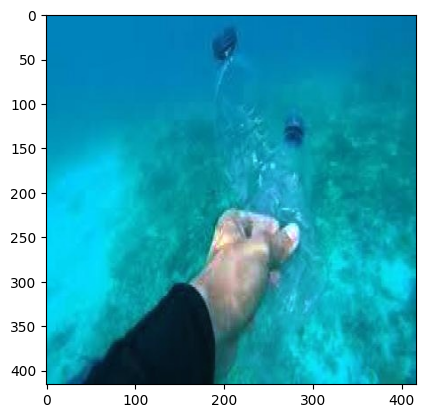

In [11]:
#load an image, plot it
i = 500
fold_path = os.path.join(data_path, 'train/images')
filenames = os.listdir(fold_path)
name = filenames[i]
print('Image n°{} : {}'.format(i, name))
file_path = os.path.join(fold_path, filenames[i])
im = np.array(Image.open(file_path))
plt.imshow(im)

## B. Get its label

In [12]:
#get the label of the image
fold_path = os.path.join(data_path, 'train/labels')
filenames = os.listdir(fold_path)
for filename in filenames:
  if name.split('.jpg')[0] == filename.split('.txt')[0]:
    filepath = os.path.join(fold_path, filename)
    f = open(filepath, 'r')
    lines = f.readlines()
    labels = []
    for line in lines:
      label = line.split()
      label = [float(i) for i in label]
      labels.append(label)
    f.close()
    break

print(labels)

[[10.0, 0.5480769230769231, 0.4050480769230769, 0.23677884615384615, 0.75], [10.0, 0.6911057692307693, 0.5384615384615384, 0.12379807692307693, 0.5649038461538461]]


## C. Annoted image

### Test

(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

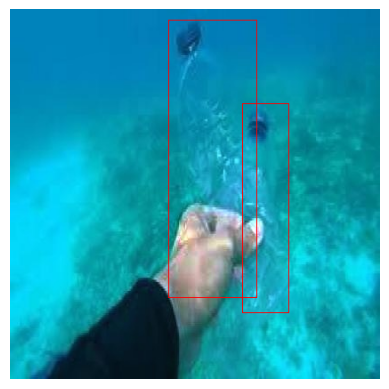

In [13]:
#load an image, from its label annoted the image
im =  Image.open(file_path)
image_width, image_height = im.size
fig, ax = plt.subplots()
ax.imshow(im)

draw = ImageDraw.Draw(im)
for label in labels:
  _, x_center, y_center, width, height = label
  x_center *= image_width
  y_center *= image_height
  width *= image_width
  height *= image_height
  top_left_x = x_center - (width / 2)
  top_left_y = y_center - (height / 2)
  bottom_right_x = x_center + (width / 2)
  bottom_right_y = y_center + (height / 2)
  draw.rectangle([top_left_x, top_left_y, bottom_right_x, bottom_right_y], outline="red")

plt.imshow(im)
plt.axis('off')

### Final function to see annoted_image

In [14]:
def annoted_image(image_name, fold='train'):
  """ Resume each previous step.
  Give the name of the image, and in which folder is it (not the path),
  fold = train, valid or test"""
  fold_path = os.path.join(data_path, fold + '/labels')
  filenames = os.listdir(fold_path)
  for filename in filenames:
    if image_name.split('.jpg')[0] == filename.split('.txt')[0]:
      filepath = os.path.join(fold_path, filename)
      f = open(filepath, 'r')
      lines = f.readlines()
      labels = []
      for line in lines:
        label = line.split()
        label = [float(i) for i in label]
        labels.append(label)
      f.close()
      break

  fold_path = os.path.join(data_path, fold + '/images')
  file_path = os.path.join(fold_path, image_name)
  im =  Image.open(file_path)
  image_width, image_height = im.size
  fig, ax = plt.subplots()
  ax.imshow(im)

  draw = ImageDraw.Draw(im)
  for label in labels:
    _, x_center, y_center, width, height = label
    x_center *= image_width
    y_center *= image_height
    width *= image_width
    height *= image_height
    top_left_x = x_center - (width / 2)
    top_left_y = y_center - (height / 2)
    bottom_right_x = x_center + (width / 2)
    bottom_right_y = y_center + (height / 2)
    draw.rectangle([top_left_x, top_left_y, bottom_right_x, bottom_right_y], outline="red")

  plt.imshow(im)
  plt.axis('off')

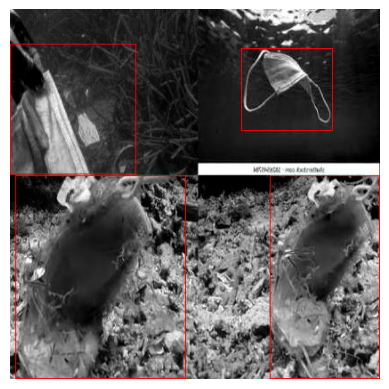

In [15]:
annoted_image('8ceae56b665f4626869d8fa8133-bf9d0_jpg.rf.e367a0036c2665ee52bc714cf52e609a.jpg')

# Datasets

For each Dataset (train valid, test), we will create a dataframe which contains ,for each images :
- name of the image
- number of waste in the image
- count each class objects

## A. Create DataFrame

In [39]:
class_names = ['Mask', 'can', 'cellphone', 'electronics', 'gbottle', 'glove', 'metal', 'misc', 'net', 'pbag', 'pbottle', 'plastic', 'rod', 'sunglasses', 'tire']
def create_dataframe(fold):
  """ create dataframe with column name of the image and number of waste in the image """
  fold_path_im = os.path.join(data_path, fold + '/images')
  image_names = os.listdir(fold_path_im)
  fold_path_lab = os.path.join(data_path, fold + '/labels')
  labels_names = os.listdir(fold_path_lab)
  ims = []
  number_trash = np.array([])
  label_counts = [[] for _ in range(len(class_names))]
  for image_name in image_names:
      exist = False
      for labels_name in labels_names:
        if labels_name.split('.txt')[0] == image_name[:len(image_name)-4]:
          filepath = os.path.join(fold_path_lab, labels_name)
          f = open(filepath, 'r')
          lines = f.readlines()
          number_trash = np.append(number_trash,len(lines))
          current_labels = [0 for _ in range(len(class_names))]
          for line in lines:
            current_labels[int(line.split()[0])] += 1
          for i in range(len(label_counts)):
            label_counts[i].append(current_labels[i])
          f.close()
          exist = True
          break
      ims.append(image_name)
      if not exist:
        #the image don't have a label
        number_trash = np.append(number_trash, np.nan)

  res = {
      'image name' : ims,
      'number of waste' : number_trash
  }
  for i in range(len(label_counts)):
    res[str(i)] = np.array(label_counts[i])
  return pd.DataFrame(res)

## Train Dataset

In [40]:
df_train = create_dataframe('train')
df_train.head()

,image name,number of waste,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg,8.0,3,0,0,0,0,5,0,0,0,0,0,0,0,0,0
1,1-1_jpg.rf.e2d17c52ecd26b5d05a7f48330f8b61c.jpg,4.0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,11007105319_jpg.rf.b2a05a1df81190cd1ad5a258161...,4.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,14_JPG_jpg.rf.286aab797f91ffe0a0852ffe1b5c27f7...,3.0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,15a6-kirmaiu900053011_jpg.rf.694b77caa6986ae13...,8.0,4,0,0,0,0,4,0,0,0,0,0,0,0,0,0


In [41]:
#some informations about number of waste in image
df_train.describe()

,number of waste,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000
mean,2.426130,0.398291,0.034179,0.073870,0.037762,0.093440,0.323043,0.015436,0.047685,0.146362,0.312845,0.256891,0.048512,0.007166,0.003859,0.626792
std,3.014678,1.129531,0.267617,0.300814,0.256069,0.701985,1.006649,0.240127,0.216974,0.376920,0.633136,1.498697,0.266430,0.124050,0.062008,2.393394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,46.000000,8.000000,7.000000,3.000000,3.000000,12.000000,8.000000,7.000000,2.000000,2.000000,9.000000,46.000000,3.000000,4.000000,1.000000,38.000000


In [42]:
# check if some labels are missing
df_train.isnull().sum()

image name         0
number of waste    0
0                  0
1                  0
2                  0
3                  0
4                  0
5                  0
6                  0
7                  0
8                  0
9                  0
10                 0
11                 0
12                 0
13                 0
14                 0
dtype: int64

## Valid Dataset

In [43]:
df_valid = create_dataframe('valid')
df_valid.head()

,image name,number of waste,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,007104744_jpg.rf.c471c6606dbf17f1e5bf3c3ad70d5...,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,007105123_jpg.rf.f173b4212d72e528f97632d8f22d3...,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0211007104833_jpg.rf.e0f4745ec9f43dee52331b71a...,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0211007104855_jpg.rf.cbe552b5815998b46f1d587fe...,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0211007104914_jpg.rf.01b4713d84c24e2d5b4409929...,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
#some informations about number of waste in image
df_valid.describe()

,number of waste,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,1.889111,0.089910,0.019980,0.070929,0.039960,0.081918,0.054945,0.021978,0.050949,0.147852,0.329670,0.283716,0.058941,0.008991,0.002997,0.626374
std,3.132202,0.340453,0.153624,0.303256,0.272767,0.700916,0.296611,0.263660,0.233242,0.360719,0.564986,2.137153,0.267437,0.122144,0.054690,2.506045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,47.000000,3.000000,2.000000,4.000000,3.000000,11.000000,2.000000,5.000000,2.000000,2.000000,4.000000,47.000000,2.000000,3.000000,1.000000,45.000000


## Test Dataset

In [45]:
df_test = create_dataframe('test')
df_test.head()

,image name,number of waste,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1bc7-iudfmpmn7245599_jpg.rf.c753c3518aa3bd3046...,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,200623160205-05-coronavirus-waste-pollution-su...,3.0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.33...,2.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7_JPG_jpg.rf.3bf999e1c1e0a9a932b23d95b27357dc.jpg,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ailnlmva_jpg.rf.116e0b65179da59d199d555cb48ed6...,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
#some informations about number of waste in image
df_test.describe()

,number of waste,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.00000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,1.928144,0.073852,0.037924,0.091816,0.037924,0.125749,0.067864,0.00998,0.065868,0.129741,0.331337,0.251497,0.079840,0.003992,0.001996,0.618762
std,2.540635,0.290749,0.269368,0.327953,0.246087,0.888907,0.333744,0.18412,0.271390,0.348043,0.728008,1.027922,0.337065,0.089353,0.044677,2.431536
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35.000000,2.000000,3.000000,2.000000,3.000000,14.000000,3.000000,4.00000,2.000000,2.000000,9.000000,12.000000,3.000000,2.000000,1.000000,35.000000


# Analysis

In [47]:
datasets = [df_train, df_valid, df_test]
datasets_names = ['Train', 'Valid', 'Test']

## A. Distribution of Trash Instances


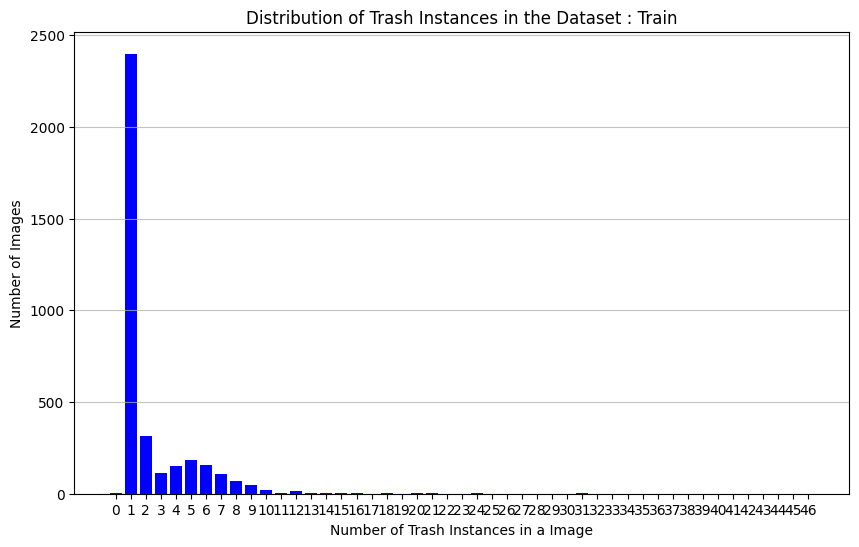

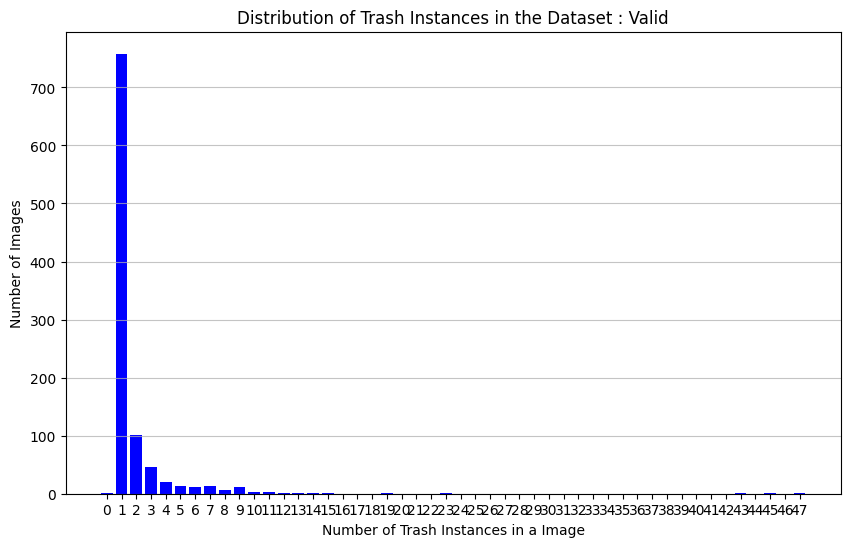

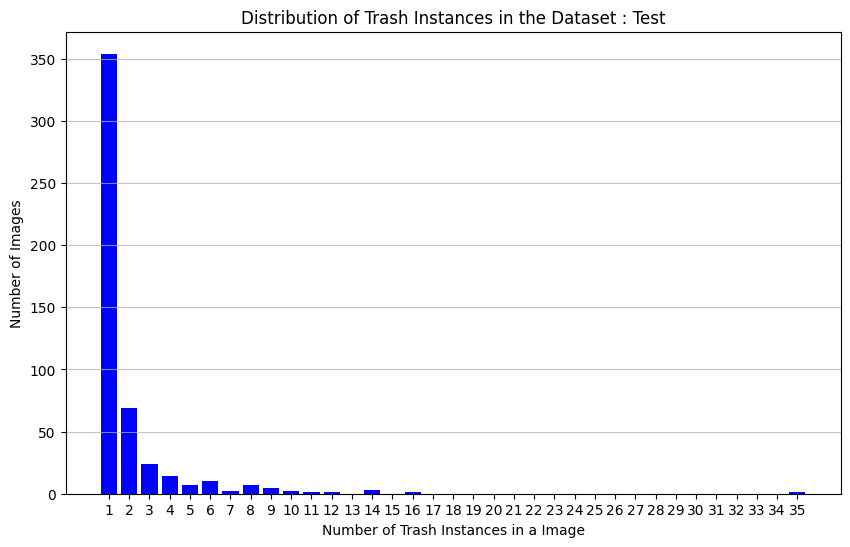

In [48]:
for i, df in enumerate(datasets):
  trash_counts = np.array(df['number of waste'])
  trash_counts = trash_counts.astype(int)
  plt.figure(figsize=(10, 6))
  plt.hist(trash_counts, bins=range(min(trash_counts), max(trash_counts) + 2), align='left', rwidth=0.8, color='blue')
  plt.xlabel('Number of Trash Instances in a Image')
  plt.ylabel('Number of Images')
  plt.title('Distribution of Trash Instances in the Dataset : ' + datasets_names[i])
  plt.xticks(range(min(trash_counts), max(trash_counts) + 1))
  plt.grid(axis='y', alpha=0.75)
  plt.show()

## B. Repartition of Trash Locations

In [49]:
def heat_map(df, fold):
  fig, ax = plt.subplots()
  for index, row in df.iterrows():
      # Calculate the coordinates of the rectangle
      x = row['x_center'] - row['width'] / 2
      y = row['y_center'] - row['height'] / 2
      width = row['width']
      height = row['height']

      # Create a rectangle and add it to the plot
      rectangle = plt.Rectangle((x, y), width, height, facecolor="blue", edgecolor="black", alpha=0.005)
      ax.add_patch(rectangle)

  # Set axis labels or any other plot settings if needed
  ax.set_xlabel('X-axis label')
  ax.set_ylabel('Y-axis label')
  ax.invert_yaxis()

  # Show the plot
  plt.title('Garbage Location heatmap for Dataset ' + fold)
  plt.show()

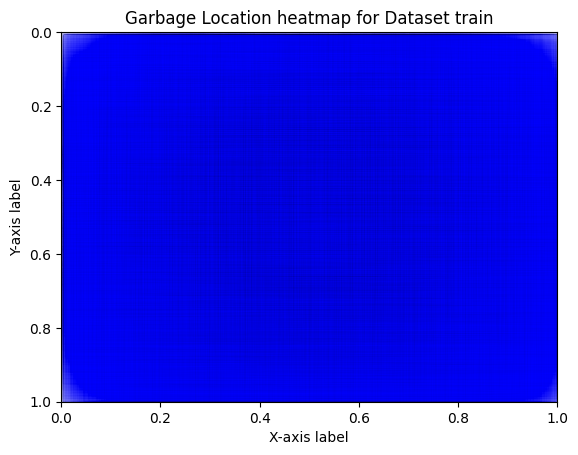

In [50]:
heat_map(df_location_train, 'train')

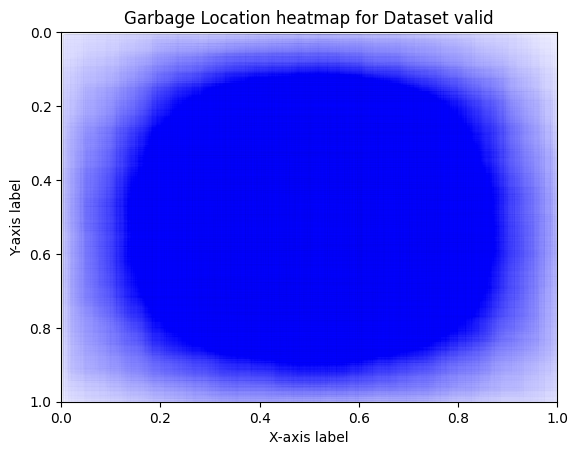

In [51]:
heat_map(df_location_valid, 'valid')

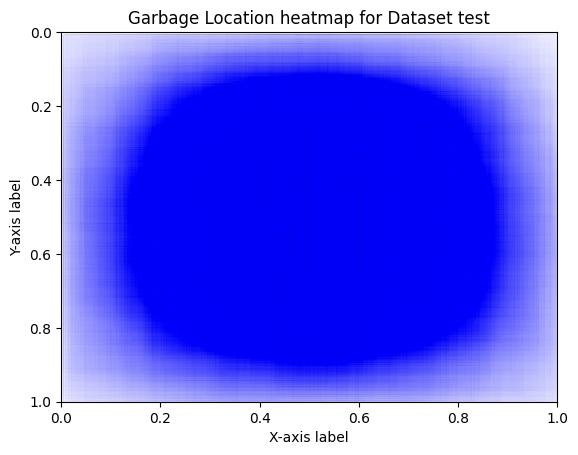

In [52]:
heat_map(df_location_valid, 'test')

## Distribution of class

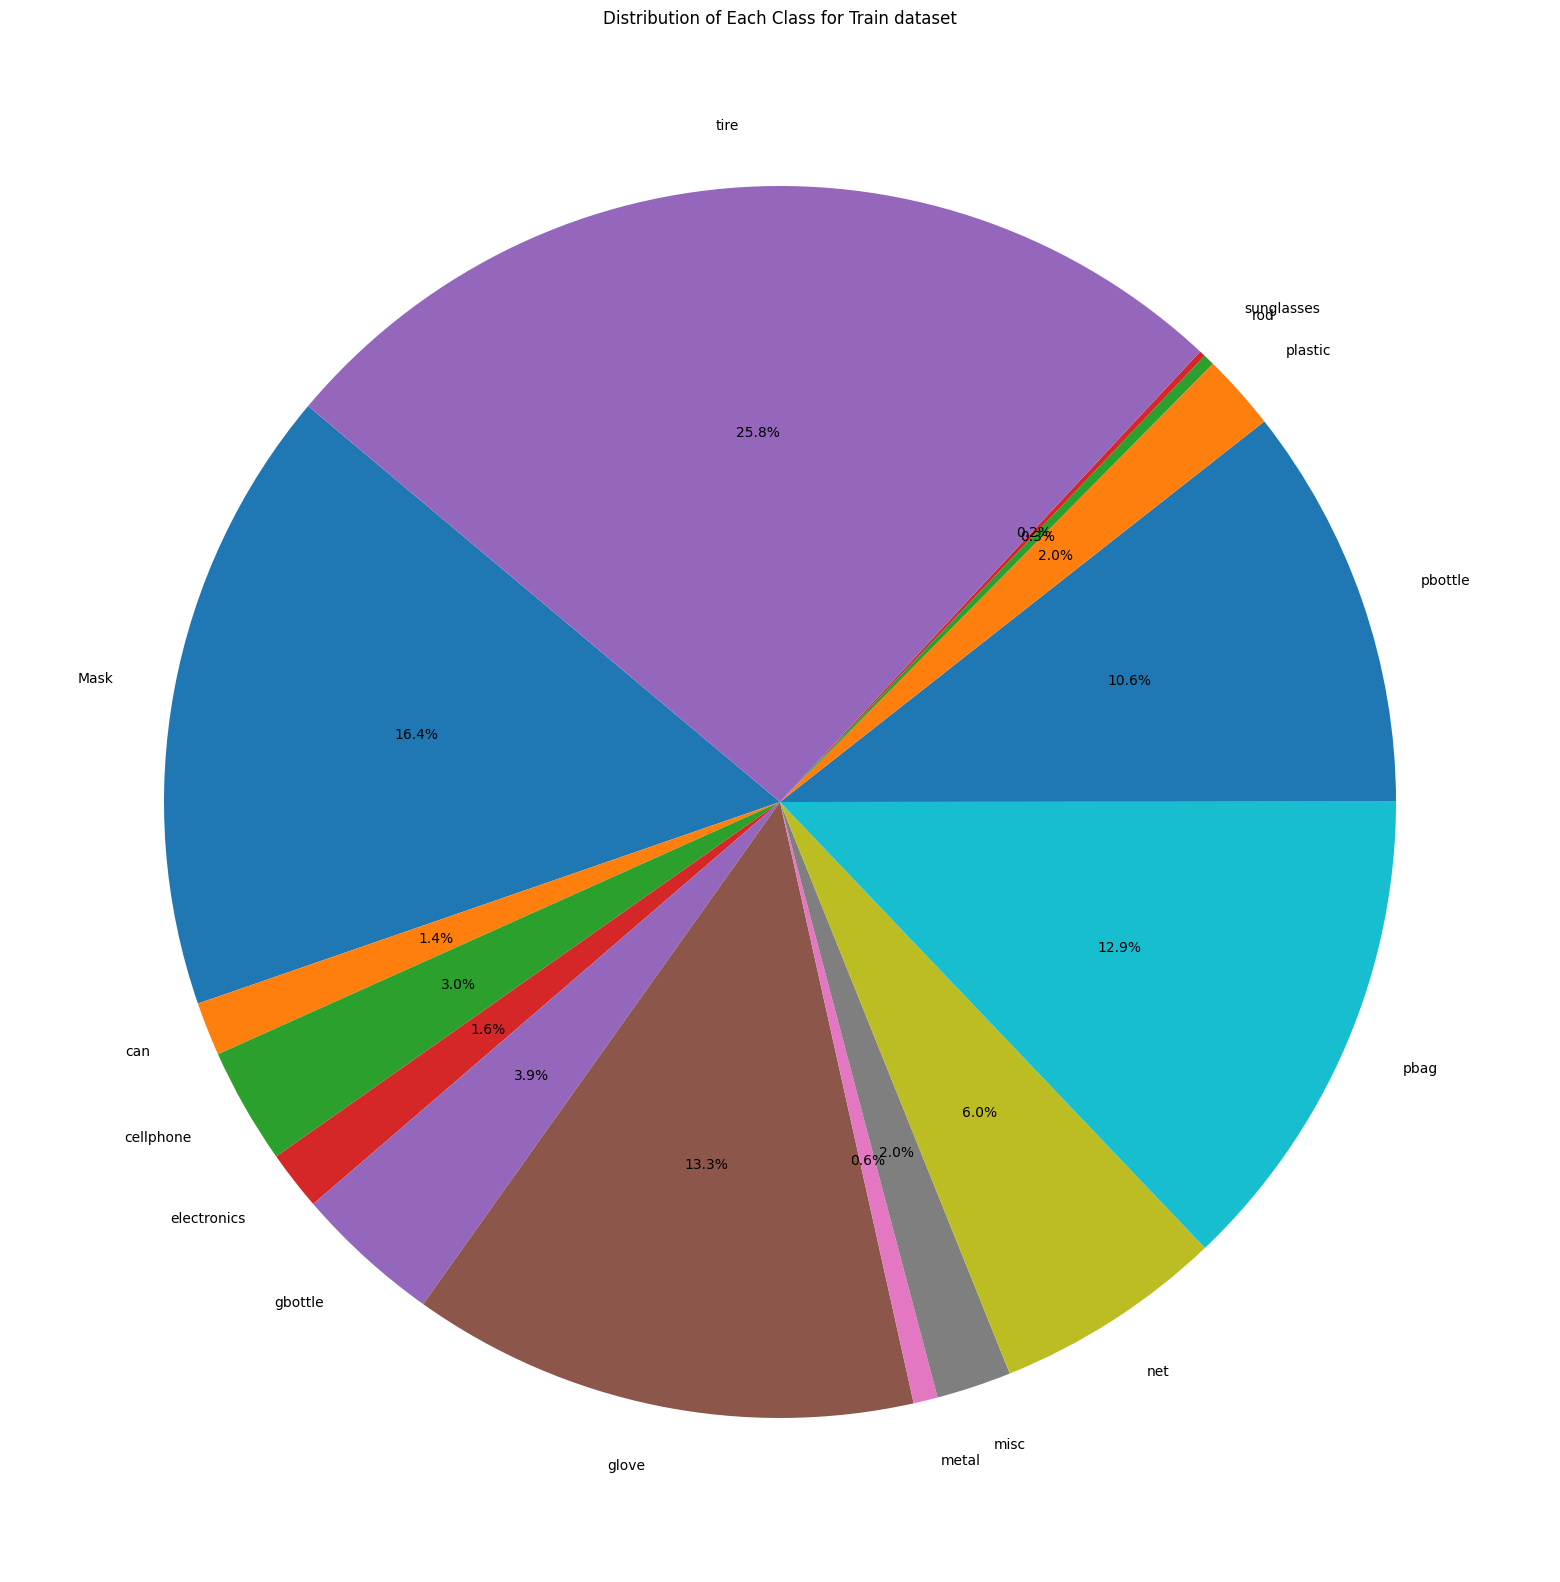

In [61]:
# Sum up the counts for each label ('0' to '14') across all rows
label_columns = [str(i) for i in range(15)]  # Columns corresponding to labels '0' to '14'
label_sums = df_train[label_columns].sum()

# Create a pie chart
plt.figure(figsize=(20, 20))
plt.pie(label_sums, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Each Class for Train dataset')
plt.show()

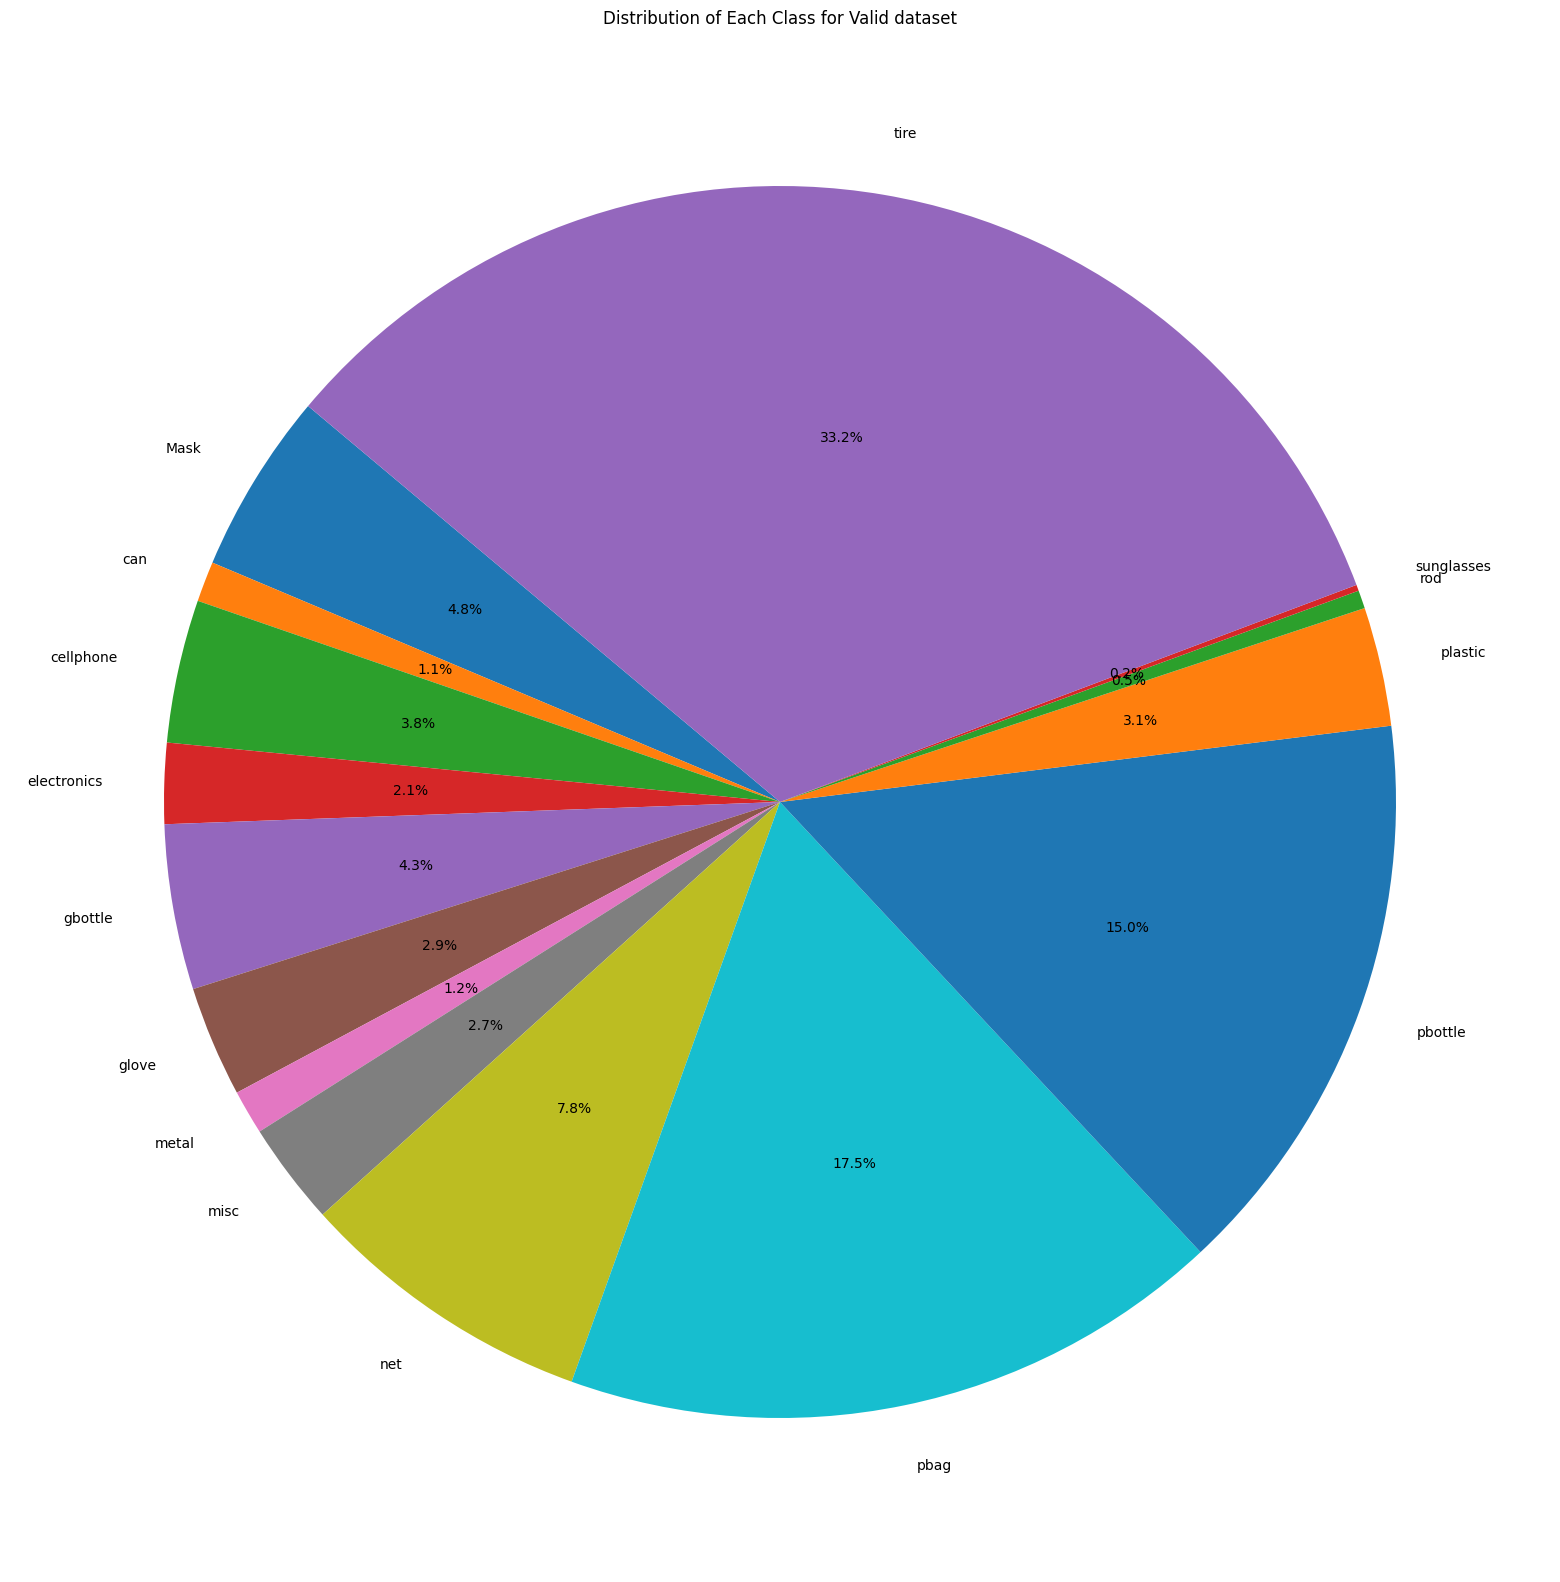

In [62]:
# Sum up the counts for each label ('0' to '14') across all rows
label_columns = [str(i) for i in range(15)]  # Columns corresponding to labels '0' to '14'
label_sums = df_valid[label_columns].sum()

# Create a pie chart
plt.figure(figsize=(20, 20))
plt.pie(label_sums, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Each Class for Valid dataset')
plt.show()

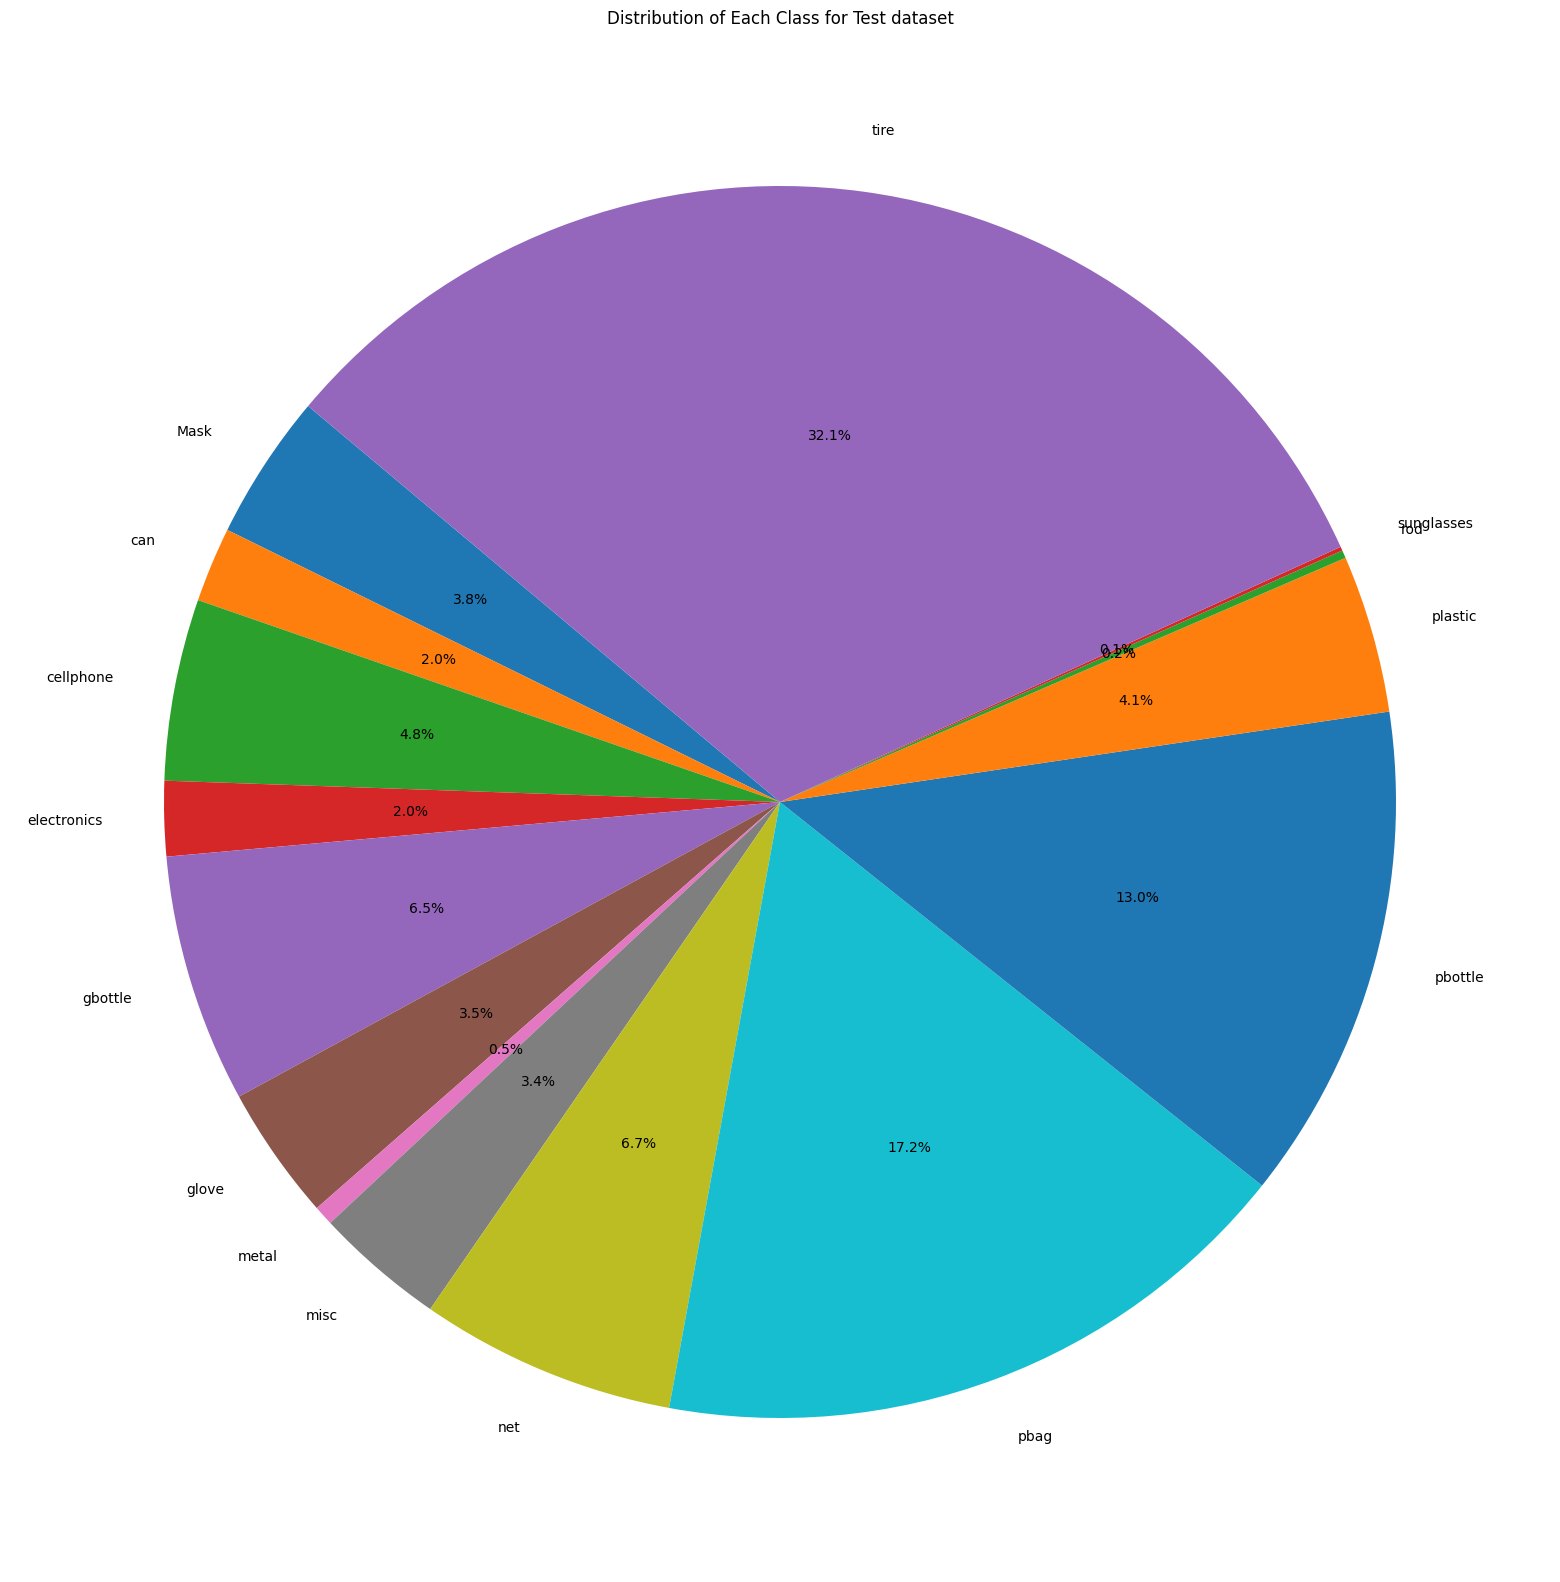

In [60]:
# Sum up the counts for each label ('0' to '14') across all rows
label_columns = [str(i) for i in range(15)]  # Columns corresponding to labels '0' to '14'
label_sums = df_test[label_columns].sum()

# Create a pie chart
plt.figure(figsize=(20, 20))
plt.pie(label_sums, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Each Class for Test dataset')
plt.show()